In [1]:
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

In [ ]:
# print(installed.packages())

In [ ]:
install.packages("keras")
install.packages("tokenizers")
install.packages("mltools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(httr)
library(tidyverse)
library(stringr)
library(dplyr)
library(keras)
library(tokenizers)
library(mltools)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
myData = read.csv("data/myDataBaseFinal1.csv")

In [ ]:
max_words <- 10000
maxlen <- 200
training_samples <- 22000
validation_samples <- 5927
tokenizer <- text_tokenizer(num_words = max_words) %>% fit_text_tokenizer(myData$description)
sequences <- texts_to_sequences(tokenizer, myData$description)
word_index = tokenizer$word_index
cat("Found",length(word_index), "unique tokens. \n")

Loaded Tensorflow version 2.9.2



Found 52487 unique tokens. 


In [ ]:
data <- pad_sequences(sequences, maxlen = maxlen)
labels <- as.array(as.numeric(factor(myData$source)))

cat("Shape of data tensor (Num Docs, Num Words in a Doc):", dim(data), "\n")

Shape of data tensor (Num Docs, Num Words in a Doc): 27929 200 


In [ ]:
unique(labels)

[1] 3 2 6 7 1 5 8 4

In [ ]:
cat('Shape of label tensor (Num Docs):', dim(labels), "\n")

Shape of label tensor (Num Docs): 27929 


In [ ]:
data[2,]

[1]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [16]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [31]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [46]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [61]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [76]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [91]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[106]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[121]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[136]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[151]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[166]    0    0    0    0    0    0    0    0    0    3 3155    5 3237   10 2009
[181]    2 1227    3  677 1722   55    3 6703  118   32  916  219 4144 8286    6
[196] 5987 2040 1142   20   43

In [ ]:
set.seed(123)
indices <- sample(1:nrow(data))

training_indices <- indices[1:training_samples]
validation_indices <- indices[(training_samples + 1):
(training_samples + validation_samples)]
x_train <- data[training_indices,]
y_train <- labels[training_indices]
x_val <- data[validation_indices,]
y_val <- labels[validation_indices]
y_val<- to_categorical(y_val)
y_train <- to_categorical(y_train)



In [ ]:
unique(y_train)

0,0,0,0,0,0,0,0,1
0,0,0,0,1,0,0,0,0
0,0,1,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,0,0
0,1,0,0,0,0,0,0,0


In [ ]:
dim(x_train)
dim(y_train)
dim(x_val)
dim(y_val)
dim(training_indices)

[1] 22000   200

[1] 22000     9

[1] 5927  200

[1] 5927    9

NULL

In [ ]:
glove_dir ="data/glove.6B"



In [ ]:
lines <- readLines(file.path(glove_dir,"glove.6B.50d.txt")) #68
#lines <- readLines(file.path(glove_dir,"glove.6B.100d.txt")) #71

#lines <- readLines(file.path(glove_dir,"glove.6B.200d.txt")) #70.7
#lines <- readLines(file.path(glove_dir,"glove.6B.300d.txt")) #71.82

In [ ]:
embeddings_index <- new.env(hash = TRUE, parent = emptyenv())

In [ ]:
for(i in 1:length(lines)) {
  line <- lines[[i]]
  values <- strsplit(line," ")[[1]]
  word <- values[[1]]
  embeddings_index[[word]] <- as.double(values[-1])
}

In [ ]:
cat("Found", length(embeddings_index),"word vectors.\n")

Found 400000 word vectors.


In [ ]:
embedding_dim <- 50

In [ ]:
embedding_matrix <- array(0, dim = c(max_words, embedding_dim))

In [ ]:
for(word in names(word_index)){
  index <- word_index[[word]]
  if (index < max_words){
    embedding_vector <- embeddings_index[[word]]
    if (!is.null(embedding_vector)){
      embedding_matrix[index+1,] <- embedding_vector
    }
    
  }
}

In [ ]:
model <- keras_model_sequential() %>% 
  layer_embedding(input_dim = max_words,
                  input_length = maxlen,
                  output_dim = embedding_dim) %>%
                  layer_flatten() %>%
                  layer_dense(units = 32, activation = "relu") %>%
                  layer_dense(units = 9, activation = "softmax")

In [ ]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 embedding (Embedding)              (None, 200, 50)                 500000      
 flatten (Flatten)                  (None, 10000)                   0           
 dense_1 (Dense)                    (None, 32)                      320032      
 dense (Dense)                      (None, 9)                       297         
Total params: 820,329
Trainable params: 820,329
Non-trainable params: 0
________________________________________________________________________________


In [ ]:
get_layer(model, index = 1) %>% 
  set_weights(list(embedding_matrix)) %>%
    freeze_weights()

In [ ]:
model %>% compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

In [ ]:
history <- model %>% fit(
  x_train, y_train,
  epochs = 20,
  batch_size = 256,
  validation_data = list(x_val, y_val)
)



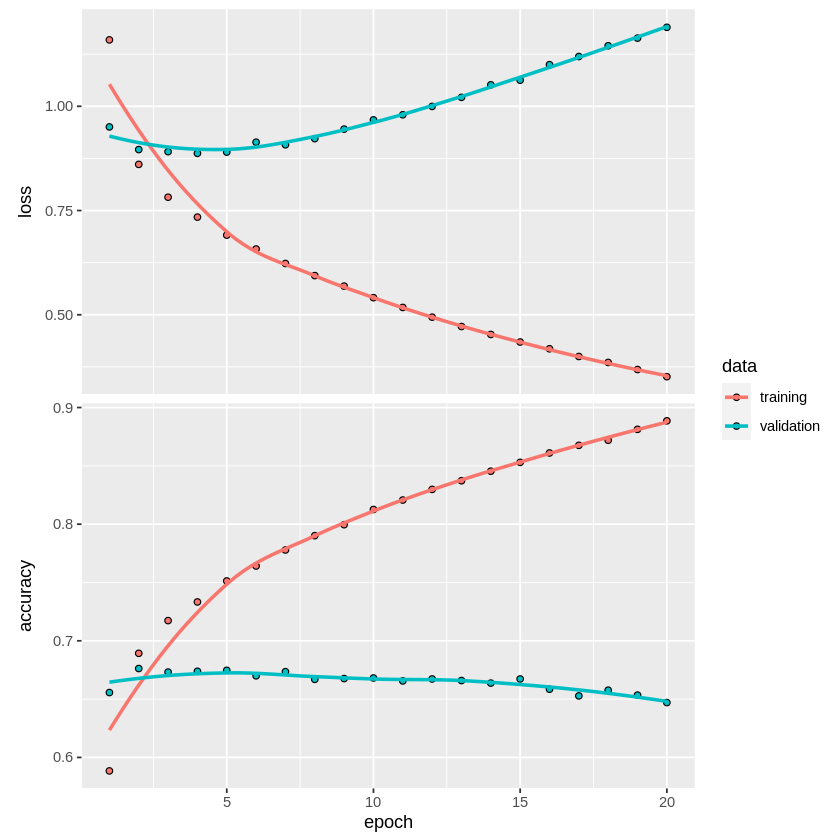

In [ ]:
plot(history)

In [ ]:
results <- model %>% evaluate(x_val, y_val)
results

loss accuracy 
1.189561 0.647039